# TESLA STOCK PREDICTION MODEL

In [1]:
# IMPORTS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Reads dataset
df = pd.read_csv("TSLA2.csv") 

In [3]:
# Removing columns we don't need
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Parameters for the model
X = df[['Date']]
y = df['Close']

In [5]:
# This block calculates the number of days between the x date and reference date(chosen to be the start date of our dataset), and store it in a new column called 'Days_Since_Start'
reference_date = datetime(2018,1,2) 
X['Days_Since_Start'] = (X['Date'] - reference_date).dt.days

In [6]:
# Train the model

model = LinearRegression()
model.fit(X[['Days_Since_Start']], y)

LinearRegression()

# INPUT HERE

In [7]:
# Input date here:

date = '2023-07-24'

In [8]:
# Grabs the actual price automaticly if its in the dataset
specific_date = pd.to_datetime(date)
days_since_reference = (specific_date - reference_date).days

if specific_date in X[['Date']].values:
    actual_price_for_specific_date = y[X['Date'] == specific_date].values[0] 
else:
    print("Date not found in the dataset. Please enter the actual price manually.")
    # Input price manually here:
    actual_price_for_specific_date = 269.06	# Your actual price is not in the datatset and needs to be added manually.


Date not found in the dataset. Please enter the actual price manually.


# INPUT ABOVE HERE

In [9]:
# Making the prediction for the specific date

X_specific_date = [[days_since_reference]]
predicted_price = model.predict(X_specific_date)

# Making the prediction for all dates in dataset to make plot
predicted_prices = model.predict(X[['Days_Since_Start']])

c:\Users\Georg\miniconda3\envs\dave3625\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Visualization of the Linear Regression Model

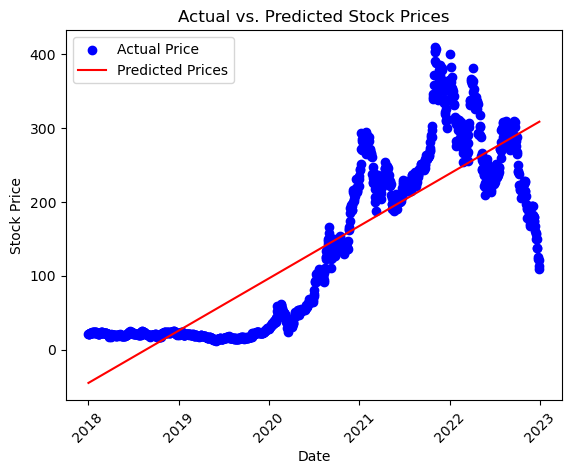

MSE = 3419.6093000279784
MAE = 47.10173687026168


In [10]:
# Makes a diagram showing the actual price as scatter and draws the prediction as a plot

plt.scatter(X['Date'], y, label='Actual Price', color='blue')
plt.plot(X['Date'], predicted_prices, label="Predicted Prices", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

print("MSE = "+str(metrics.mean_squared_error(y, predicted_prices)))
print("MAE = "+str(metrics.mean_absolute_error(y, predicted_prices)))

# Prediction and score

In [11]:
# Prints and calculates the prediction percentage score for a specific date given predicted and actual prices for that date.
# Assess how close the prediction is to the actual value as a percentage.
print("Predicted Price for", specific_date, ":", predicted_price[0])
print("Actual Price for", specific_date, ":", actual_price_for_specific_date) 
percentage_score = ((predicted_price - actual_price_for_specific_date) / actual_price_for_specific_date) * 100
print("Prediction Percentage Score:", percentage_score[0])

Predicted Price for 2023-07-24 00:00:00 : 348.8978990196525
Actual Price for 2023-07-24 00:00:00 : 269.06
Prediction Percentage Score: 29.672897873950987
